# Project: Investigate The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Here I'm going to explore the Movie Database(movie_database.csv) to answer some of the questions with regards to movies and find out the trends that are experienced over time in the movie industry. The initial step here is going to be cleaning of the dataset and the performing EDA(Exploratory Data Analysis) to get insights and do visualizations and in the end from the data we have analysed I'm going to form conclusions based on the questions that I have in mind.


The questions are as follows: 

1. What are the trends observed between voting and number of movie in the dataset?
2. What are the trends in budget for making a movie, required over the given years?
3. Which is the most popular genre in movies?

In [68]:
# importing the packages and the required files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [69]:
#  Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('movie_database.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [70]:
# Exploring the shape of the data to find out the number of rows and columns
df.shape

(10866, 21)

In [71]:
# Removing duplicates from the dataset
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [72]:
# Finding the sum of null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [73]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [74]:
# explore the shape again
df.shape

(10865, 21)

<a id='eda'></a>
## Exploratory Data Analysis
First we will explore the dataset to find out different values using describe() and different features in the dataset

In [75]:
# Finding out the data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [76]:
# Finding the average values and other important information
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : What are the trends observed between voting and number of movie in the dataset?

In [77]:
# finding the mean
df['vote_average'].mean()

5.975011504832047

In [78]:
# finding the minimum
df['vote_average'].min()

1.5

In [79]:
# finding the maximum
df['vote_average'].max()

9.2

In [80]:
# The movie that got the highest rating
df.query('vote_average >= 9.2')['original_title']

3894    The Story of Film: An Odyssey
Name: original_title, dtype: object

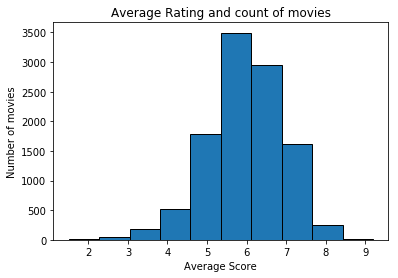

In [81]:
plt.hist(df['vote_average'], bins=10, histtype='bar', ec='black')

# Labeling
plt.xlabel('Average Score')
plt.ylabel('Number of movies')
plt.title('Average Rating and count of movies')

# Plot the histogram
plt.show()

On average we can see that most of the movies are given ratings around 5.9 - 6, which can also be considered as an average figure. The minimum rating is of 1.5 and the maximum rating is 9.2, the first result that we returned when we try to find out a movie that has a rating of 9.2 is "The Story of Film: An Odyssey".




### Research Question 2 : What are the trends in budget for making a movie, required over the given years?

In [82]:
# Filtering out the items that has budget_adj as 0
df_budget = df.query('budget_adj != 0')
df_budget.shape

(5169, 21)

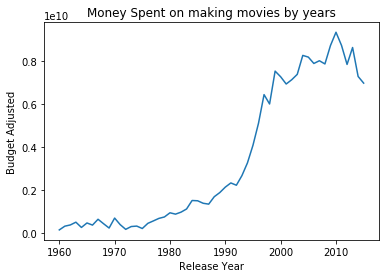

In [83]:
# total amount of money spent every year
df_budget.groupby('release_year')['budget_adj'].sum().plot()
plt.xlabel('Release Year')
plt.ylabel('Budget Adjusted')
plt.title('Money Spent on making movies by years');

We can see from the above figure that there is continous increase in the amount of money that is spent on making movies, although there are some ups and downs but on an average there is rise.

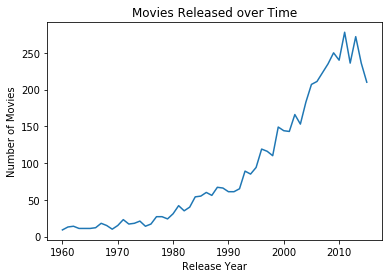

In [84]:
# number of movies
df_budget.groupby('release_year')['budget_adj'].count().plot()
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Movies Released over Time');

As we can see that there is an overall increase in the budget of making movies, but recently we can see that there is a minor decrease, but over time it should even out. We see correlation as well between these two figures. The graph looks almost the same and over time whenever there is more budget spent the number of movies released also increases.

### Research Question 3  : Which is the most popular genre in movies?

In [85]:
# Here I create a function to do the seperation for seperation of genres
# As a lot of the movies are related to a lot of different types of genres
def sep(col):
    # seperating genres using | seperator 
    df_v1 = df[col].str.cat(sep = '|')
    # generate a pandas Series
    df_v1 = pd.Series(df_v1.split('|'))
    count = df_v1.value_counts(ascending = False)
    return count

# return a count of genres
genre_count = sep('genres')
genre_count.head()

Drama       4760
Comedy      3793
Thriller    2907
Action      2384
Romance     1712
dtype: int64

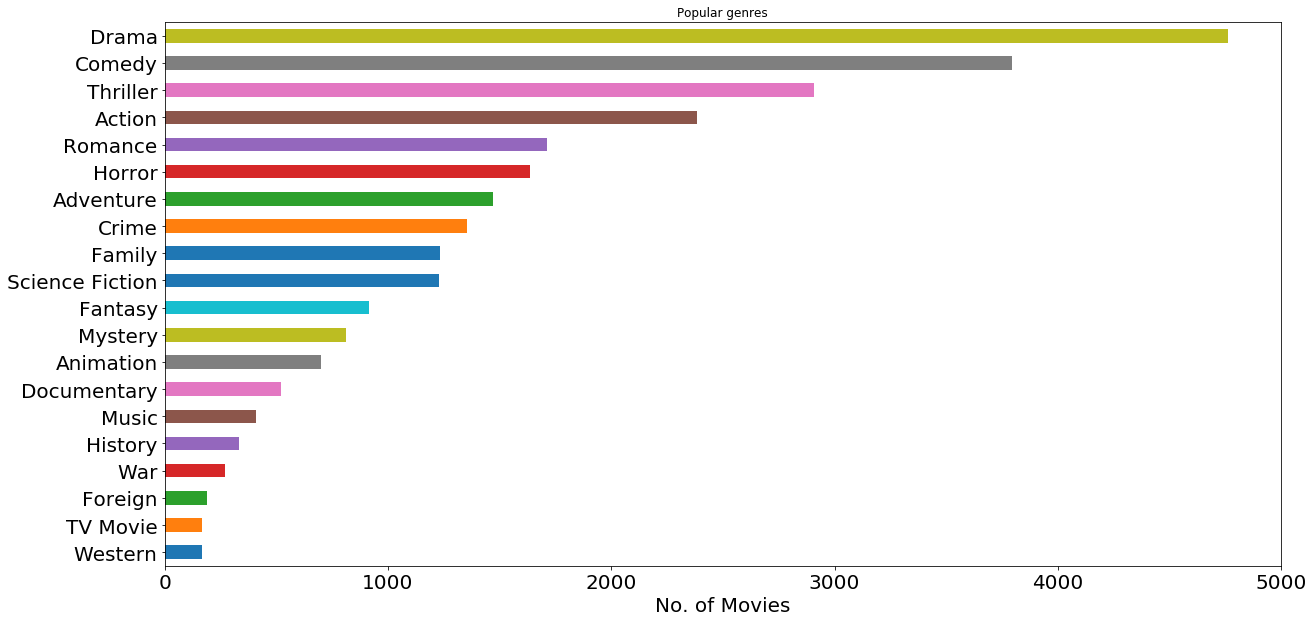

In [86]:
# Sort genres in ascending order
genre_count.sort_values(ascending = True, inplace = True)
# generating plot
plot = genre_count.plot.barh(fontsize = 20)
plot.set(title = 'Popular genres')
plot.set_xlabel('No. of Movies', fontsize = '20')
plot.figure.set_size_inches(20, 10)
# plot
plt.show()

We can see that over time most of the movies that have been made are of the genre 'Drama' followed by 'Comedy', 'Thriller' and 'Action'

<a id='conclusions'></a>
## Conclusions

> Considering the first question we can see that most of the ratings were between 5.9-6 on an average and only one movie has got a rating of 9.2, it's "The Story of Film: An Odyssey".

> For the second question we can conclude that there is a boom in the movie industry,(there are some ups and downs) and we also saw that when there was more budget, the number of movies made that year were very well correlated, this could be due a lot of factors like economy, expensive equipements and demand for much better quality of movies and better VFX. One of the limitations I found in the data is that there are a lot of null values, and if I remove all the rows that contain null values, the size of the dataset would be reduced by a big factor. 


> The most popular genre we found out was the 'Drama', which is used in most of the movies, because a wide number of movies use drama, 'Comedy' is second on the list. I personally live 'Comedy' and watch most of it. Another limitation that I found in the dataset is that its very small dataset, to make inference we would need a lot of more data, we could also have an inter related dataset which allows us to know how customers are voting certain movies, because its a personal choice and we cannot just let votes decide its popularity. There could be lot of movies which a person might love but it could have very low ratings, because it's just a personal preference.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_Movie_Database.ipynb'])

0